# <span style="color:blue">Dynamic Programming
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

# Memoization

Memoization is a **top-down approach to dynamic programming**. 
- It's generally **similar to** a regular **recursive approach, but** it **stores results of each recursive call**.
- **If** the **same recursive call** is **repeated**, the **saved value is reused**, reducing the need to go down a recursive chain.

When applicable, memoization can significantly improve the efficiency of a recursive algorithm.

## Calculating Factorial
Let's look again at the implementation of factorials.

### Factorial - Recursive implementation
We saw this implemention during our discussion of recursion.

In [ ]:
def factorial_rec(n):
    '''
    Recursive implementation of factorials
    '''
    # Base case: factorial of 0 or 1 is 1
    if n < 2:
        return 1
    # Recursive case: n! = n * (n-1)!
    else:
        return n * factorial_rec(n-1)

#### Basic test

In [ ]:
for n in range(10):
    print(f"Factorial of {n}: {factorial_rec(n)}")

#### Problem with recursive appraoch

As we recall, the recursive algorithm **works well** enough for **small numbers**, but will **break** down for **large numbers**, because we will hit a **recursion limit**. Let's see how **memoization** will **help reducing** the **recursions**.

### Factorial - Memoization implementation

#### Is this a good fit for memoization?
Let's check if this solutions meets the key characteristics for dynamic programming:
- **Optimal structure** - **Can** this **problem** be **broken down** in **smaller subproblems?**
    - **Yes**. Yes, a factorial is a combination of factorials of the smaller numbers.
- **Overlapping subproblems** - Are the **subproblems encountered repeatedly** during the process of solving the main problem?
    - **Yes**. By it's very definition, every factorial includes factorials of all the numbers smaller than it.

#### Class based implementation
The **memoization implementation requires** the **use of** a **separate data structure** to **store previously calculated results**. If we don't want to expose that, we can **use** our **Object Oriented Programming** skills, and **wrap** that up **in a class**.

In [ ]:
class Factorial:
    '''
    Use memoization to calculate the Factorial. Maintain a class variable to accumulate previous
    results, so they can be reused.
    '''
    # class variable to store previously calculated results
    fact_results = {}

    @classmethod
    def factorial(cls, n):
        '''
        Memoization implementation of factorials
        '''
        # Base case: factorial of 0 or 1 is 1
        if n < 2:
            return 1

        # if the result has being previously calculated, return it
        if n in cls.fact_results:
            return cls.fact_results[n]

        # Calculate the result using recursion
        result = n * cls.factorial(n-1)

        # store the result in our results variable, so it's available for future caluclations
        cls.fact_results[n] = result
        
        return result

#### Basic tests

In [ ]:
for n in range(10):
    print(f"Factorial of {n}: {Factorial.factorial(n)}")

### Testing with a big number

We'll this address our problem with big numbers? Maybe ...

Let's try going straight to 10,000.

In [ ]:
#n = 10000

#### <span style="color:red">**WARNING: This next step will probably crash your Python kernel**</span>
<span style="color:red"> Save your notebook if you made changes.</span>

In [ ]:
# calculate the factorial using recursion
result = Factorial.factorial(n)

# print factorial, or a message if the number is bigger than 15 digits
if (result > 999999999999999):
    print(f"Factorial of {n}: {str(result)[:40]}... (truncated)")
else:
    print(f"Factorial of {n}: {result}")

**HINT**: To re-run the notebook up to here, make sure you **change the *n* value** above **to** something smaller like **10**, or the problem will repeat itself.

#### Why did I crash?
As we have it, the **algorithm will only reuse values** that had been **previously calculated**. So since we **went straight to 10,000!** without doing other than the simple 10 earlier, this will still **require** a **lot of recursions** (9,990 to be precise). So that hit our **system recursion limit**.

### <span style="color:blue">OPTIONAL: </span>Improved class based implementation

In [ ]:
class SafeFactorial:
    '''
    Use memoization to calculate the Factorial. Maintain a class variable to accumulate previous
    results, so they can be reused.
    '''
    # class variable to store previously calculated results
    fact_results = {}

    @classmethod
    def _init_results(cls, n):
        '''
        Initialize the results dictionary up to n
        '''
        # initialize factorials up to n in our results table
        for i in range(n):
            # calculate lower factorials. No need to save result. We just need them to be saved in the class
            cls._factorial(i)
       
    @classmethod
    def _factorial(cls, n):
        '''
        Memoization implementation of factorials.
        This internal method is subject to potential issues with recursion limits, so it's
        not called directly.
        '''
        # Base case: factorial of 0 or 1 is 1
        if n < 2:
            return 1

        # if the result has being previously calculated, return it
        if n in cls.fact_results:
            return cls.fact_results[n]

        # Calculate the result using recursion
        result = n * cls._factorial(n-1)

        # store the result in our results variable, so it's available for future caluclations
        cls.fact_results[n] = result
        
        return result

    @classmethod
    def factorial(cls, n):
        '''
        This method will calculate factorials using an internal memoization method.
        The method first makes sure there are previous results calculated, to avoid
        a recursion limit issue
        '''

        # first check whether we already have save results for this number
        if n not in cls.fact_results:
            # if not, initialize the results up to n
            cls._init_results(n)

        # now we can safely call our recursive function
        return cls._factorial(n)

#### Re-testing with a big number
Let's **repeat** the **same test**, with our **new SafeFactorial**. Again, such is my confidence, I'm **starting out with "n = 20000"**. Who needs that measly 10,000 test?

In [ ]:
n = 20000

In [ ]:
# calculate the factorial using recursion
result = SafeFactorial.factorial(n)

# print factorial, or a message if the number is bigger than 15 digits
if (result > 999999999999999):
    print(f"Factorial of {n}: {str(result)[:40]}... (truncated)")
else:
    print(f"Factorial of {n}: {result}")

## The Knapsack problem
The **knapsack problem elicits this kind of reaction** when I try to break it down.

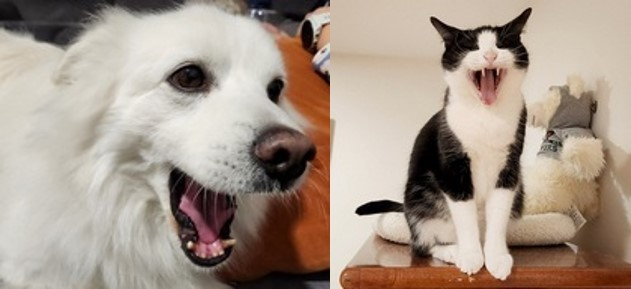

It is a **common example of dynamic programming** that includes optimal substructure and overlapping subproblems. The problem is as follows:
- You are **given** a **set of items** **with** a set **value and weight for each item**.
- You are **also given** a **knapsack** that **can carry a maximum weight**.

**Find** the **maximum possible total value** of items I can get **from** a **combination of items in the knapsack** so the **total weight does not surpass the maximum** capacity of the knapsack.

As it was in the coin change problem, we might be **tempted to think** that the **problem is** to **find** the actual **items** that lead us to the **optimal solution**, **but that's not it**. The **"classic" knapsack problem** does not list the solutions. It's only **about calculating the optional total value**.

### Knapsack problem - Recursive implementation
The **problem is broken down into smaller subproblems** of the same type. You must **consider each item** and **determine if** it **should be** put in the **knapsack or not**. We will **recursively check solutions** for **either scenario** (with or without).

In [ ]:
def knapsack_rec(weights, values, capacity, item_idx = 0):
    '''
    Recursive knapsack problem implementation. Returns the maximum total value of items you can have in 
    the knapsack. The function checks item from the begginning to the end of the list.

    Parameters:
        weights: list of item weights
        values: list of item values
        capacity: maximum weight capacity of the knapsack
        item_idx: index of the current item being considered (default is the first item)
    '''
    # Base case: if the capacity is 0 or no items are left
    if capacity == 0 or item_idx >= len(values):
        return 0

    # get the weight and value of the item with this index
    item_weight = weights[item_idx]     
    item_value = values[item_idx]
    
    # If the weight of the item is more than the capacity ...
    if item_weight > capacity:
        # item is too heavy to include, so recurse without it
        return knapsack_rec(weights, values, capacity, item_idx + 1)

    # else, we have the option of including the item or not
    else:
        # Calculate the max value we include the item. That will be the price of the item, 
        # plus the max total price we can have with the remaining items. We calculate that 
        # recursively, but we need to deduct the item weight from the available capacity. 
        total_with_item = item_value + knapsack_rec(weights, values, 
                                                    capacity - item_weight, 
                                                    item_idx + 1)

        # Calculate the max value if we exclude the item
        total_without_item = knapsack_rec(weights, values, capacity, item_idx + 1)

        # The optimal result with will be the maximum between the two options
        return max(total_with_item, total_without_item)

#### Basic tests
We'll start with a simple example with **4 items**. The **items themselves** are **not part of** the **function input**, only their weights and values.  So you can simply **envision them** as ***Item_0, Item_1, Item_2,*** and ***Item_3*** (good to start with 0 so it matches the list index).

In [ ]:
# initialize function inputs
weights = [2, 3, 4, 5]
values  = [3, 4, 5, 6]
capacity = 5

# calculate maximum possible value of knapsack
max_value = knapsack_rec(weights, values, capacity)
print("Maximum value:", max_value)

### <span style="color:blue">OPTIONAL</span>: Recursive implementation with print statements
We are **not walking through** the **details of** the **recursion** here, since the m**ain module topic is memoization**. However, for anyone who wants to better visualize the progress of the cursion, I'm **providing** this **optional section** with a special **version with** indented **print statements**.

In [ ]:
def indent_str(level):
    '''
    Utility function to return a string to indent recursion level
    '''
    return "" if level == 0 else "|   " * level

def knapsack_rec_wp(weights, values, capacity, item_idx = 0, rlevel = 0):
    '''
    Recursive knapsack problem implementation. Returns the maximum total value of items you can have in 
    the knapsack. The function checks item from the begginning to the end of the list.

    Parameters:
        weights: list of item weights
        values: list of item values
        capacity: maximum weight capacity of the knapsack
        item_idx: index of the current item being considered (default is the first item)
    '''
    print(indent_str(rlevel))
    print(indent_str(rlevel) + f">>> Entered function for item {item_idx} and capacity {capacity}")

    # Base case: if the capacity is 0 or no items are left
    if capacity == 0 or item_idx >= len(values):
        print(indent_str(rlevel) + f"<< Exit case - Returning 0")
        return 0

    # get the weight and value of the item with this index
    item_weight = weights[item_idx]     
    item_value = values[item_idx]
    print(indent_str(rlevel) + f"Item {item_idx} --> weight = {item_weight}, values = {item_value}")
    
    # If the weight of the item is more than the capacity ...
    if item_weight > capacity:
        # item is too heavy to include, so recurse without it
        print(indent_str(rlevel) + f"Item weight {item_weight} is bigger than capacity. Recursing to next item")
        total_without_item = knapsack_rec_wp(weights, values, capacity, item_idx + 1,  rlevel + 1)
        print(indent_str(rlevel) + f"<< Returning {total_without_item}")
        return total_without_item

    # else, we have the option of including the item or not
    else:
        # Calculate the max value we include the item. That will be the price of the item, 
        # plus the max total price we can have with the remaining items. We calculate that 
        # recursively, but we need to deduct the item weight from the available capacity.
        print(indent_str(rlevel) + f"Checking total WITH item. Recursing with weight of capacity({capacity}) - item_weight({item_weight}) = {capacity - item_weight}")
        total_with_item = item_value + knapsack_rec_wp(weights, values, 
                                                    capacity - item_weight, 
                                                    item_idx + 1, rlevel + 1)
        print(indent_str(rlevel) + f"Total WITH item {item_idx} = {item_value} + {total_with_item - item_value} = {total_with_item}")
        
        # Calculate the max value if we exclude the item
        print(indent_str(rlevel) + f"Checking total WITHOUT item. Recursing with same weight of {capacity}")
        total_without_item = knapsack_rec_wp(weights, values, capacity, item_idx + 1, rlevel + 1)
        print(indent_str(rlevel) + f"Total WITHOUT item {item_idx} = {total_without_item}")
        
        # The optimal result with will be the maximum between the two options
        print(indent_str(rlevel) + f"<< Returning max of WITH({total_with_item}) and WITHOUT({total_without_item}) = {max(total_with_item, total_without_item)}")
        return max(total_with_item, total_without_item)

#### Basic tests
We'll start with a simple example with **4 items**. The **items themselves** are **not part of** the **function input**, only their weights and values.  So you can simply **envision them** as ***Item_0, Item_1, Item_2,*** and ***Item_3*** (good to start with 0 so it matches the list index).

In [ ]:
# initialize function inputs
weights = [2, 3, 4, 5]
values  = [3, 4, 5, 6]
capacity = 5

# calculate maximum possible value of knapsack
max_value = knapsack_rec_wp(weights, values, capacity)
print("Maximum value:", max_value)

### Listing possible solutions - Black Friday sale example
It's always good to have a good story to go with the algorithm, so let's make one up. Assume you are going to a big **Black Friday "door buster" sale**, where each **custumer** is only **allowed to fill up one bag** worth of products. The **bag has** a **weight limit**. With a list of available products on sale, and their weights, how can you **maximize your purchases** to buy the **highest combined value** of products.

**Note**: Yes, this is a partially nostalgic tale, since many of us sit at home buying on online sales.

#### Implementation with list of possible solutions
If we're going to have a fun implementation with Black Friday products, we need to be able to visualize the products. We also **need to see** the **list of products** that **we** actually **bought**, to make up the total.

We will **enhance** our **solution** to **maintain** the **list of products** making up the solution. The **algorithm** is **essentially the same**, but in additional to the maximum value, we **also accumulate and return** a **list of the items** that went with that maximum.

As we said, the **"classic" knapsack problem does not list the solutions**. However, for instructional purposes, I feel being able to visualize the items helps. 

The *"_ws"* at the end of the function is for "**w**ith **s**olution".

In [ ]:
def knapsack_rec_ws(items, weights, values, capacity, item_idx = 0):
    '''
    Recursive knapsack problem implementation. Returns the maximum total value of items you can have in 
    the knapsack. The function checks item from the begginning to the end of the list.

    Parameters:
        weights: list of item weights
        values: list of item values
        capacity: maximum weight capacity of the knapsack
        item_idx: index of the current item being considered (default is the first item)
    '''

    # Base case: if the capacity is 0 or no items are left
    if capacity == 0 or item_idx >= len(values):
        return 0, []
            
    # get the weight and value of the item with this index
    item_weight = weights[item_idx]     
    item_value = values[item_idx]
    
    # If the weight of the item is more than the capacity ...
    if item_weight > capacity:
        # item is too heavy to include, so recurse without it
        return knapsack_rec_ws(items, weights, values, capacity, item_idx + 1)

    # else, we have the option of including the item or not
    else:      
        # Calculate the max value we include the item. That will be the price of the item, 
        # plus the max total price we can have with the remaining items. We calculate that 
        # recursively, but we need to deduct the item weight from the available capacity.
        total_with_item, sol_list1 = knapsack_rec_ws(items, weights, values, 
                                                     capacity - item_weight, 
                                                     item_idx + 1)
        total_with_item += item_value
        sol_list1.append(items[item_idx])
        
        # Calculate the max value if we exclude the item
        total_without_item, sol_list2 = knapsack_rec_ws(items, weights, values, capacity, item_idx + 1)

        # The optimal result with will be the maximum between the two options
        if (total_with_item >= total_without_item):
            return total_with_item, sol_list1
        else:
            return total_without_item, sol_list2

#### Testing with our Black Friday loot

##### Some cheap jewelry items ...

In [ ]:
# initialize function inputs
products = ["ring", "pendant", "watch", "knecklace", "bracelet", "earrings"]
weights = [1, 2, 6, 5, 4, 3]
prices = [2, 6, 10, 14, 12, 8]  
capacity = 12

print(f"Calculating optimal solution for {len(products)} products within a capacity of {capacity} lbs")

# calculate maximum possible value of knapsack
max_value, sol_list = knapsack_rec_ws(products, weights, prices, capacity)
print("\nItems in solution: ")
total_weight = 0
for item in sol_list:
    prod_index = products.index(item)
    total_weight += weights[prod_index]
    print(f"{item: <15} ({weights[prod_index]} lbs) - ${prices[prod_index]}")
    
print(f"\nTotal knapsack weight: {total_weight} lbs")
print(f"Total knapsack value: ${max_value}")

Just **to confirm** the **print solution didn't change anything**, let's **call** the **original *knapsack_rec*** and make sure we get the same answer.

In [ ]:
# calculate maximum possible value of knapsack
print("Maximum value:", knapsack_rec(weights, prices, capacity))

##### Some electronics ...

In [ ]:
# initialize function inputs
products = ["Laptop", "SLR Camera", "Cell phone", "Headphone", "Mouse", "keyboard"]
weights = [9, 7, 2, 2, 1, 2]
prices = [700, 800, 750, 80, 25, 30]
capacity = 17

print(f"Calculating optimal solution for {len(products)} products within a capacity of {capacity} lbs")

# calculate maximum possible value of knapsack
max_value, sol_list = knapsack_rec_ws(products, weights, prices, capacity)
print("\nItems in solution: ")
total_weight = 0
for item in sol_list:
    prod_index = products.index(item)
    total_weight += weights[prod_index]
    print(f"{item: <15} ({weights[prod_index]} lbs) - ${prices[prod_index]}")
    
print(f"\nTotal knapsack weight: {total_weight} lbs")
print(f"Total knapsack value: ${max_value}")

### Testing with a bigger list
**What happens** if we have a **longer list of items**, and a **capacity** a bit **larger?** It's a bigger sale now, with jewelwry, electronics, clothing, pet suplpies and sports equipment.

#### <span style="color:red">**WARNING: This next step will hang your Python kernel** </span>
<span style="color:red">You can **stop the cell** to break.</span>

In [ ]:
# initialize function inputs
products = ["ring", "pendant", "watch", "knecklace", "bracelet", "earrings",
           "Laptop", "SLR Camera", "Cell phone", "Headphone", "Mouse", "keyboard",
           "tshirt", "skirt", "summer dress", "suit", "tie", "belt",
           "leash", "collar", "bowl", "treats", "chewey toy", "catnip",
           "soccer ball", "tennis racket", "cleats", "shin guard", "socks", "pads"]
weights = [1, 2, 6, 5, 4, 3,
           9, 7, 2, 2, 1, 2,
           3, 4, 4, 6, 2, 3,
           2, 3, 4, 2, 3, 2,
           8, 6, 3, 4, 1, 3]
prices = [2, 6, 10, 14, 12, 8,
        700, 800, 750, 80, 25, 30,
         9, 12, 24, 100, 20, 18,
         15, 12, 5, 8, 11, 6,
         19, 80, 60, 40, 5, 15]
capacity = 50

print(f"Calculating optimal solution for {len(products)} products within a capacity of {capacity} lbs")
print()

# calculate maximum possible value of knapsack
max_value, sol_list = knapsack_rec_ws(products, weights, prices, capacity)
print("\nItems in solution: ")
total_weight = 0
for item in sol_list:
    prod_index = products.index(item)
    total_weight += weights[prod_index]
    print(f"{item: <15} ({weights[prod_index]} lbs) - ${prices[prod_index]}")
    
print(f"\nTotal knapsack weight: {total_weight} lbs")
print(f"Total knapsack value: ${max_value}")

This wasn't a very big list either. **Just 30 items** were **enough to cause** me **problems**.

### Complexity analysis
Once again, the recursion **complexity** is **high**. Because at **each recursive step**, you are **making two additional calls** (the *with"* call, and the *"without"* call). So the final number of steps would be **2 x 2 x ... x 2**, or **2<sup>n</sup>**. The *n* in this case is proportional to the capacity, because we'll keep doing those splits until we reach the weight capacity.

And bear in mind this has nothing to do with the print statements. The regular recursive version still does the same splits, and would also hang (you can test it).

- **Time complexity: <span style="color:blue">O(2<sup>n</sup>)**</span>

### Knapsack problem - Memoization implementation

#### Is this a good fit for memoization?
Let's check if this solutions meets the key characteristics for dynamic programming:
- **Optimal structure** - **Can** this **problem** be **broken down** in **smaller subproblems?**
    - **Yes**. Yes, clearly see that our recursive solution does precisely that.
- **Overlapping subproblems** - Are the **subproblems encountered repeatedly** during the process of solving the main problem?
    - **Yes**. That one is a little harder to visualize, but the subproblems will repate themselves at times. We will be able to confirm that with some print statements in our code.

#### Implementation
As it's generally the case with memoization, the **implementation** will **not significantly alter** the **recursive nature of the algorithm**. It will **just be more effective**, by saving results of previous recursions.

In [ ]:
def _knapsack_mem(saved_solutions, weights, values, capacity, item_idx):
    '''
    Recursive knapsack problem implementation. Returns the maximum total value of items you can have in 
    the knapsack. The function checks item from the begginning to the end of the list.

    Parameters:
        weights: list of item weights
        values: list of item values
        capacity: maximum weight capacity of the knapsack
        item_idx: index of the current item being considered (default is the first item)
    '''
    # Base case: if the capacity is 0 or no items are left
    if capacity == 0 or item_idx >= len(values):
        return 0

    # if we previously solved this combination of item and capacity, return the previous solution
    if saved_solutions[item_idx][capacity] != -1:
        return saved_solutions[item_idx][capacity]
        
    # get the weight and value of the item with this index
    item_weight = weights[item_idx]     
    item_value = values[item_idx]
    
    # If the weight of the item is more than the capacity ...
    if item_weight > capacity:
        # item is too heavy to include, so recurse without it
        return _knapsack_mem(saved_solutions, weights, values, capacity, item_idx + 1)

    # else, we have the option of including the item or not
    else:
        # Calculate the max value we include the item. That will be the price of the item, 
        # plus the max total price we can have with the remaining items. We calculate that 
        # recursively, but we need to deduct the item weight from the available capacity. 
        total_with_item = item_value + _knapsack_mem(saved_solutions, weights, values, 
                                                    capacity - item_weight, 
                                                    item_idx + 1)

        # Calculate the max value if we exclude the item
        total_without_item = _knapsack_mem(saved_solutions, weights, values, capacity, item_idx + 1)

        # The optimal result with will be the maximum between the two options
        solution = max(total_with_item, total_without_item)

        # save the solution for this combination of item and capacity
        saved_solutions[item_idx][capacity] = solution

        return solution

def knapsack_mem(weights, values, capacity):
    '''
    This method initializes the table that maintains every possible solution for an item 
    value and max capacity. This will be passed to a recursive memoization solution.
    '''
    # initialize lookup table with solutions for evey combination of item values and target capacity
    saved_solutions = [[-1 for x in range(capacity + 1)] for x in range(len(values))] 

    # call internal recursive memoization solution, starting with the first item
    max_value = _knapsack_mem(saved_solutions, weights, values, capacity, 0)
    
    return max_value

#### Basic test

In [ ]:
# initialize function inputs
weights = [2, 3, 4, 5]
values =  [3, 4, 5, 6]
capacity = 5

# calculate maximum possible value of knapsack
max_value = knapsack_mem(weights, values, capacity)
print("Maximum value:", max_value)

Great. That **matches what we had before, but** it's **hard to see the magic** behind it, **and whether** we **saved any time**. So let's add some extra printing.

### Memoization implementation with print statements
**Recursion** is **not the topic** at hand, **so** we're **not** going to flood the algorithm with **print statements to understand the recursive solution**. What we do **want to show** is the **progressive saving of solutions**, **and how** they get **reused**. To do that, we'll used a utility function to print the solutions table.

##### Print table utility function
This is a utility table that will print a 2x2 table. We use this to print our solutions table. This is not directly related to the algorithm and could be used for any 2x2 array.

In [ ]:
def print_table(table, rows, cols):
    '''
    Simple utility to print our solutions table
    '''
    # print column headers
    print("   |", end="")
    for col in range(cols + 1):
        # print the table value for that item/weight combination
        print(str(col).center(3) + "|", end="")
    print()
    for col in range(cols + 2):
        # print the table value for that item/weight combination
        print("---|", end="")
    print()
                
    # iterate through each item index
    for row in range(rows):
        # iterate through each possible maximim weight capcaity
        print(str(row).center(3) + "|", end="")
        for col in range(cols + 1):
            # print the table value for that item/weight combination
            print(str(table[row][col]).rjust(3) + "|", end="")
        # next line
        print()

##### Print version of the code
This is the same as the previous version, but simply prints the table any time a value is saved, and prints a message when it gets reused.

In [ ]:
def _knapsack_mem_wp(saved_solutions, weights, values, capacity, item_idx):
    '''
    Recursive knapsack problem implementation. Returns the maximum total value of items you can have in 
    the knapsack. The function checks item from the begginning to the end of the list.

    Parameters:
        weights: list of item weights
        values: list of item values
        capacity: maximum weight capacity of the knapsack
        item_idx: index of the current item being considered (default is the first item)
    '''
    # Base case: if the capacity is 0 or no items are left
    if capacity == 0 or item_idx >= len(values):
        return 0

    # if we previously solved this combination of item and capacity, return the previous solution
    if saved_solutions[item_idx][capacity] != -1:
        print(f"\n###### Used saved solutions[{item_idx}][{capacity}] = {saved_solutions[item_idx][capacity]} ######")
        return saved_solutions[item_idx][capacity]
        
    # get the weight and value of the item with this index
    item_weight = weights[item_idx]     
    item_value = values[item_idx]
    
    # If the weight of the item is more than the capacity ...
    if item_weight > capacity:
        # item is too heavy to include, so recurse without it
        return _knapsack_mem_wp(saved_solutions, weights, values, capacity, item_idx + 1)

    # else, we have the option of including the item or not
    else:
        # Calculate the max value we include the item. That will be the price of the item, 
        # plus the max total price we can have with the remaining items. We calculate that 
        # recursively, but we need to deduct the item weight from the available capacity. 
        total_with_item = item_value + _knapsack_mem_wp(saved_solutions, weights, values, 
                                                    capacity - item_weight, 
                                                    item_idx + 1)

        # Calculate the max value if we exclude the item
        total_without_item = _knapsack_mem_wp(saved_solutions, weights, values, capacity, item_idx + 1)

        # The optimal result with will be the maximum between the two options
        solution = max(total_with_item, total_without_item)

        # save the solution for this combination of item and capacity
        saved_solutions[item_idx][capacity] = solution
        
        print(f"\nSaving solution [{item_idx}][{capacity}] with value {solution}. Solutions table now is:")
        print_table(saved_solutions, len(values), max_capacity)
        return solution

def knapsack_mem_wp(weights, values, capacity):
    '''
    This method initializes the table that maintains every possible solution for an item 
    value and max capacity. This will be passed to a recursive memoization solution.
    '''

    # global max_capacity
    global max_capacity
    max_capacity = capacity
    
    # initialize lookup table with solutions for evey combination of item values and target capacity
    saved_solutions = [[-1 for x in range(capacity + 1)] for x in range(len(values))] 

    print("Inital table:")
    print_table(saved_solutions, len(values), max_capacity)

    # call internal recursive memoization solution, starting with the first item
    max_value = _knapsack_mem_wp(saved_solutions, weights, values, capacity, 0)
    
    return max_value

#### Basic test

In [ ]:
# initialize function inputs
weights = [2, 3, 4, 5, 3]
values =  [3, 4, 5, 6, 1]
capacity = 10

# calculate maximum possible value of knapsack
max_value = knapsack_mem_wp(weights, values, capacity)
print("\nMaximum value:", max_value)

#### What can we see from above?
We can **see** the **values being progressively saved**. You can also see a **few instances** where we were **able to reuse previously calculated solutions**. It may **not** seem like **a lot** here, **because** the **inputs are small**. But **we'll revisit that later**.

#### Implementation with list of possible solutions and tracking of reused solutions
We'll do a "two for one deal" here. 
- We'll **update** our **enhanced solution** that also **tracks our solution list** to **also** be **"memoized"**.
- We'll also **track how many times** we were able to **reused saved solutions**. In this version we're **not going to print the solution tables** and the times we reused an item. As we saw above, that **generates a lot of output**.

To **enhance** our **solution** to **maintain** the **list of products** we have to make some changes in the return values. The **algorithm** is **essentially the same**, but in addition to the maximum value, we **also accumulate and return** a **list of the items** that went with that maximum.

**PLEASE NOTE** that **maintaining the solutions here** is **particularly expensive** from a **memory perspective**, because we're not only maintaining previous max value results, but also the complete list that went along with that. And we do that for all combinations. And since lists are always passed by reference, we need to make copies every time. So remember that the **"classic" knapsack problem does not list the solutions**. I only include it because it makes it more intuitive to visualize a solution. So if you are ever asked to show the knapsack problem solution, just use the standard version we saw initially, without the list of products.

Also note that **since** the **tracking of reused values** is something we're doing **strictly to illustrate a point**, we'll **use a global variable** for it. I **wouldn't do that if** it **was** an integral **part of** the **solution**.

In [ ]:
def _knapsack_mem_ws(saved_solutions, items, weights, values, capacity, item_idx = 0):
    '''
    Recursive knapsack problem implementation. Returns the maximum total value of items you can have in 
    the knapsack. The function checks item from the begginning to the end of the list.

    Parameters:
        weights: list of item weights
        values: list of item values
        capacity: maximum weight capacity of the knapsack
        item_idx: index of the current item being considered (default is the first item)
    '''

    # Base case: if the capacity is 0 or no items are left
    if capacity == 0 or item_idx >= len(values):
        return 0, []
    
    # if we previously solved this combination of item and capacity, return the previous solution
    if saved_solutions[item_idx][capacity] != -1:
        # update global variable that maintains solutions reused
        global reused_solutions
        reused_solutions += 1
        # return previously save solution
        return saved_solutions[item_idx][capacity]
        
    # get the weight and value of the item with this index
    item_weight = weights[item_idx]     
    item_value = values[item_idx]
    
    # If the weight of the item is more than the capacity ...
    if item_weight > capacity:
        # item is too heavy to include, so recurse without it
        total, sol_list = _knapsack_mem_ws(saved_solutions, items, weights, values, capacity, item_idx + 1)
        return total,sol_list.copy()

    # else, we have the option of including the item or not
    else:
        # Calculate the max value we include the item. That will be the price of the item, 
        # plus the max total price we can have with the remaining items. We calculate that 
        # recursively, but we need to deduct the item weight from the available capacity.
        total_with_item, sol_list1 = _knapsack_mem_ws(saved_solutions, items, weights, values, 
                                                     capacity - item_weight, 
                                                     item_idx + 1)
        total_with_item += item_value
        sol_list1.append(items[item_idx])
        
        # Calculate the max value if we exclude the item
        total_without_item, sol_list2 = _knapsack_mem_ws(saved_solutions, items, weights, values, capacity, item_idx + 1)

        # The optimal result with will be the maximum between the two options
        if (total_with_item >= total_without_item):
            # save the solution for this combination of item and capacity
            saved_solutions[item_idx][capacity] = (total_with_item, sol_list1.copy())
            return total_with_item, sol_list1
        else:
            saved_solutions[item_idx][capacity] = (total_without_item, sol_list2.copy())
            return total_without_item, sol_list2

def knapsack_mem_ws(products, weights, values, capacity):
    '''
    This method initializes the table that maintains every possible solution for an item 
    value and max capacity. This will be passed to a recursive memoization solution.
    '''

    # define a global variable used to track reuse of saved solutions
    global reused_solutions
    reused_solutions = 0

    # initialize lookup table with solutions for evey combination of item values and target capacity
    saved_solutions = [[-1 for x in range(capacity + 1)] for x in range(len(values))] 

    # call internal recursive memoization solution, starting with the first item
    return _knapsack_mem_ws(saved_solutions, products, weights, values, capacity, 0)

### Testing with our Black Friday loot

#### Some cheap jewelry items ...

In [ ]:
# initialize function inputs
products = ["ring", "pendant", "watch", "knecklace", "bracelet", "earrings"]
weights = [1, 2, 6, 5, 4, 3]
prices = [2, 6, 10, 14, 12, 8]  
capacity = 12

# calculate maximum possible value of knapsack
max_value, sol_list = knapsack_mem_ws(products, weights, prices, capacity)
print("\nItems in solution: ")
total_weight = 0
for item in sol_list:
    prod_index = products.index(item)
    total_weight += weights[prod_index]
    print(f"{item: <15} ({weights[prod_index]} lbs) - ${prices[prod_index]}")
    
print(f"\nTotal knapsack weight: {total_weight} lbs")
print(f"Total knapsack value: ${max_value}")

# print number of reused solutions
print(f"\nWe reused a total of {reused_solutions} saved solutions")

#### Some electronics ...

In [ ]:
products = ["Laptop", "SLR Camera", "Cell phone", "Headphone", "Mouse", "keyboard"]
weights = [9, 7, 2, 2, 1, 2]
prices = [700, 800, 750, 80, 25, 30]
capacity = 12

# calculate maximum possible value of knapsack
max_value, sol_list = knapsack_mem_ws(products, weights, prices, capacity)
print("\nItems in solution: ")
total_weight = 0
for item in sol_list:
    prod_index = products.index(item)
    total_weight += weights[prod_index]
    print(f"{item: <15} ({weights[prod_index]} lbs) - ${prices[prod_index]}")
    
print(f"\nTotal knapsack weight: {total_weight} lbs")
print(f"Total knapsack value: ${max_value}")

# print number of reused solutions
print(f"\nWe reused a total of {reused_solutions} saved solutions")

We **haven't reused a lot** of solutions with the simple examples above, **but those** were **small lists, and small capacities**.

### Testing again with a bigger list
**What happens** if we try our **bigger list of items?**  Once again, we'll **dare the odds**, and add **even more products**. We had **30 items before**, so let's add **10 more**, for a **total of 40**. We'll buy some diving equipment this time.

In [ ]:
# initialize function inputs
products = ["ring", "pendant", "watch", "knecklace", "bracelet", "earrings",
           "Laptop", "SLR Camera", "Cell phone", "Headphone", "Mouse", "keyboard",
           "tshirt", "skirt", "summer dress", "suit", "tie", "belt",
           "leash", "collar", "bowl", "treats", "chewey toy", "catnip",
           "soccer ball", "tennis racket", "cleats", "shin guard", "socks", "pads",
           "dive computer", "regulator", "mask", "snorkel", "wetsuit", "fins", "defog", "BCD", "weights", "gloves"]
weights = [1, 2, 6, 5, 4, 3,
           9, 7, 2, 2, 1, 2,
           3, 4, 4, 6, 2, 3,
           2, 3, 4, 2, 3, 2,
           8, 6, 3, 4, 1, 3,
           3, 4, 2, 3, 4, 3, 1, 6, 10, 2]
prices = [2, 6, 10, 14, 12, 8,
        700, 800, 750, 80, 25, 30,
         9, 12, 24, 100, 20, 18,
         15, 12, 5, 8, 11, 6,
         19, 80, 60, 40, 5, 15,
         150, 220, 80, 32, 265, 90, 15, 450, 40, 55]
capacity = 50

print(f"Calculating optimal solution for {len(products)} products within a capacity of {capacity} lbs")
print()

# calculate maximum possible value of knapsack
max_value, sol_list = knapsack_mem_ws(products, weights, prices, capacity)
print("\nItems in solution: ")
total_weight = 0
for item in sol_list:
    prod_index = products.index(item)
    total_weight += weights[prod_index]
    print(f"{item: <15} ({weights[prod_index]} lbs) - ${prices[prod_index]}")
    
print(f"\nTotal knapsack weight: {total_weight} lbs")
print(f"Total knapsack value: ${max_value}")

Oh yeah! It's a party in the ocean!

#### Why didn't I hang this time?
Let's see how many times we saved solutions this time ...

In [ ]:
print(f"We reused a total of {reused_solutions} saved solutions")

In my execution (just in case you changed some of the values), we **reused 1460 saved solutions**. **Does that mean** we **saved 1460 steps** in the execution **?**

**No, we saved a lot more!**

Remember that **when** I **reused** a **solution**, I'm **preventing** the **code** to **continue down another recursive chain**. And as we know, **each recursive chain** could **result in** a lot **more subseuqent calls**. So **each** of these **saved solution** actually **saved ton of calls underneath**.

### Complexity analysis
It would be extremely **difficult** to try to **walk through** that **algorithm**, and **deduce how many times individual sections** are **run**. That's because we have the extra element of the reuse. That changes nhow many times we trigger recursions.

Fortunately, we can **estimate the complexity** in a round about way. We know that solving the problem with memoization will depend on building that solutions table. We saw that in our "with print" version. The **solutions table is a two-dimensional table**, with the **number of items in the rows** (let's call that ***n***), and all the possible capacity values **0 to the max capacity in the columns** (we'll call that ***m***). The **time** it **will take us** to **fill** all the **cells** in that table will be **approximately *n \* m***. So our complexity is ...


- **Time complexity: <span style="color:blue">O(n \* m)**</span>

## <span style="color:blue">OPTIONAL</span>: Fibonacci
We've already seen the **Fibonacci series**, where **each number** is the **sum of** the **two previous** numbers: ***0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...***

The **Fibonnaci problem** is usually about **returning** the ***nth* Fibonnaci number**. So:
- fibonnaci(4) = 3
- fibonnaci(5) = 5
- fibonacci(6) = 8
- fibonacci(7) = 13

## Fibonacci

### Fibonacci - Recursive implementation
We saw this implemention during our discussion of recursion.

In [ ]:
def fibonacci_rec(n): 
	# Base case: First Fibonacci number is 0 
	if n == 0: 
		return 0 
	# Base case: Second Fibonacci number is 1 
	elif n == 1: 
		return 1 
	# Recursive case 
	else: 
		return fibonacci_rec(n - 1) + fibonacci_rec(n - 2) 

#### Basic test

In [ ]:
# Set  number to find fibonnaci for
fib_num = 10

print(f"Fibonnaci({fib_num}) = {fibonacci_rec(fib_num)}")

#### Larger number test
Let's try a **larger number**. Doesn't even need to be that big. **100** will be **enough to cause problems**.

#### <span style="color:red">**WARNING: This next step will hang your Python kernel** </span>
<span style="color:red">You can **stop the cell** to break.</span>

In [ ]:
# Set  number to find fibonnaci for
fib_num = 100

print(f"Fibonnaci({fib_num}) = {fibonacci_rec(fib_num)}")

### Complexity analysis
Once again, the recursion is clever, but the time **complexity** is **high**. Because at **each recursive step**, you are **making two additional calls** (the *"(n - 1)"* call, and the *"(n - 2)"* call). So the final number of steps would be **2 x 2 x ... x 2**, or **2<sup>n</sup>**.
- **Time complexity: <span style="color:blue">O(2<sup>n</sup>)**</span>

### Fibonacci - Memoization implementation

#### Is this a good fit for memoization?
Let's check if this solutions meets the key characteristics for dynamic programming:
- **Optimal structure** - **Can** this **problem** be **broken down** in **smaller subproblems?**
    - **Yes**. We can start with solutions for a smaller Fibonacci problems, and build our way up.
- **Overlapping subproblems** - Are the **subproblems encountered repeatedly** during the process of solving the main problem?
    - **Yes**. By it's very definition, a Fibonacci problem depends on the values before.

#### Implementation using Python's functools module cache
This is very **similar to** the **Factorial problem**. As we did in that case, we **need to define** a **separate data structure to cache previous executions** of our function, so they can be reused the next time. **Then our code** would **have** an ***if statement*** that would always **check first for** a **previously cached solution**. Again, just like we did with the factorials. 

Or ...

**Another option** is to **use Python's functools module cache to store those results** for us. If we import that module, and **use the @cache decorator before our function**, our **previous calls get cached** internally by the functools module. Just imagine that the **functools cache** is **implementing** that **if statement check for you**, and returning previously calculated values.

In [ ]:
from functools import cache

@cache
def fibonacci_mem(n):
    # Base case: First Fibonacci number is 0
    if n == 0:
        return 0
    # Base case: Second Fibonacci number is 1 
    elif n == 1: 
        return 1 
    # Recursive case 
    else: 
        return fibonacci_mem(n - 1) + fibonacci_mem(n - 2) 

#### Basic test

In [ ]:
# Set  number to find fibonnaci for
fib_num = 10

print(f"Fibonnaci({fib_num}) = {fibonacci_mem(fib_num)}")

#### Larger number test
Let's **try again**. And once again, we'll **raise the stakes**. Let's do **1,000!**

In [ ]:
# Set  number to find fibonnaci for
fib_num = 1000

print(f"Fibonnaci({fib_num}) = {fibonacci_mem(fib_num)}")

### Complexity analysis
This is an **interesting** one, **because with the @cache decorator**, the **code appears to be the same**. But we have to **remember** that **we are saving previous results**, just as if we had created our our data structure. It's just that the **functools cache** is **doing it for us**. So **how** does the **complexity change with** those **saved resuls?**

Let's look at the line:
> return **<span style="color:red">fibonacci_mem(n - 1)</span>** + **<span style="color:blue">fibonacci_mem(n - 2)</span>**

**First** the **code** will **evaluate** **<span style="color:red">fibonacci_mem(n - 1)</span>** , **and then** it evaluates **<span style="color:blue">fibonacci_mem(n - 2)</span>**

For the **normal recursive code**, the **evaluation of **<span style="color:red">fibonacci_mem(n - 1)</span>** goes down** its **full recursion chain**. **After that** comes all the way back, the **<span style="color:blue">fibonacci_mem(n - 2)</span> portion starts**. This will result in **2 fully recursive calls for each invocation**. So we ended up with **O(2<sup>n</sup>)** <br>

**However, remember** that the first part **<span style="color:red">fibonacci_mem(n - 1)</span>** evaluation, will **recursively call fibonacci_mem** for **(n - 2)**, then **(n - 3)**, then **(n - 4) and so on**, until it reaches the base case. And **all** these **results are cached by *functools.cache***. So **by the time** the second part **evaluation of <span style="color:blue">fibonacci_mem(n - 2)</span> starts**, it will have **cached results available for everything** it needs under it. So **in the end**, we are really **only going down one recursive path** for each invocation. Which gives us a much more manageable **O(n)**.  
- **Time complexity: <span style="color:blue">O(n)**</span>